# Random Forest Hyperparameter Tuning 

This shows some simple code of how to plot n_estimators to F1 score.

In [8]:
%matplotlib notebook 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score

In [5]:
data = pd.read_csv("../data/occupancy.csv")
data.head()

,datetime,temperature,relative humidity,light,C02,humidity,occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [7]:
X = data[["temperature", "relative humidity", "light", "C02", "humidity"]]
y = data["occupancy"]

# N-Estimators Visualizer

<IPython.core.display.Javascript object>


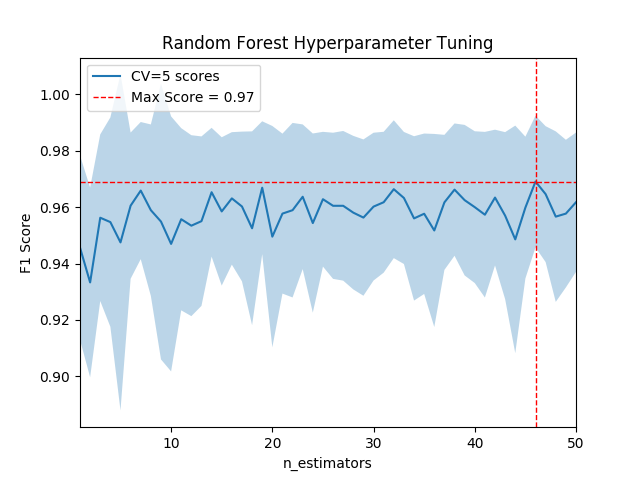

CPU times: user 49.6 s, sys: 163 ms, total: 49.7 s
Wall time: 49.8 s


In [18]:
%%time 

def n_estimators_tuning(X, y, min_estimators=1, max_estimators=50, cv=5, ax=None, save=None):
    
    if ax is None:
        _, ax = plt.subplots()
    
    means = []
    stds = []
    n_estimators = np.arange(min_estimators, max_estimators+1)

    for n in n_estimators:
        model = RandomForestClassifier(n_estimators=n)
        scores = cross_val_score(model, X, y, cv=cv)
        means.append(scores.mean())
        stds.append(scores.std())
    
    means = np.array(means)
    stds = np.array(stds)
    
    ax.plot(n_estimators, means, label="CV={} scores".format(cv))
    ax.fill_between(n_estimators, means-stds, means+stds, alpha=0.3)
    
    max_score = means.max()
    max_score_idx = np.where(means==max_score)[0]
    ax.axhline(max_score, ls="--", lw=1, c='r')
    ax.axvline(n_estimators[max_score_idx], ls="--", lw=1, c='r', label="Max Score = {:0.2f}".format(max_score))
    
    
    ax.set_xlim(min_estimators, max_estimators)
    ax.set_xlabel("n_estimators")
    ax.set_ylabel("F1 Score")
    ax.set_title("Random Forest Hyperparameter Tuning")
    ax.legend(loc='best')
    
    if save:
        plt.savefig(save)
    
    return ax
    

n_estimators_tuning(X, y)